# 3 Linear Regression: Exercícios aplicados

In [1]:

import numpy as np
import pandas as pd
import ISLP
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-darkgrid')


**8. Essa questão envolve o uso de regressão linear simples no conjunto de dados `Auto`.**

**(a) Utilize a função `sm.OLS()` para realizar uma regressão linear simples, tendo o consumo de combustível (mpg) como a resposta e a potência do motor (horsepower) como o preditor. Use a função `summarize()` para printar os resultados. Comente sobre os resultados, por exemplo:**

    i. Existe uma relação entre o preditor e a resposta?

    ii. Quão forte é a relação entre o preditor e a resposta?

    iii. A relação entre o preditor e a resposta é positiva ou negativa?

    iv. Qual é o consumo de combustível (mpg) previsto para uma potência do motor de 98? Quais são os intervalos de confiança e de previsão associados de 95%?


In [2]:
#limpando os dados
auto = pd.read_csv('F:/statistical learning/Auto.data', delim_whitespace=True)
numeric_values = pd.to_numeric(auto['horsepower'], errors='coerce')
non_numeric_values = auto[pd.isna(numeric_values)]['horsepower']
auto['horsepower'] = auto['horsepower'].replace('?', pd.NA)
auto = auto.dropna()
auto['horsepower'] = auto['horsepower'].astype(float)

In [3]:
y = auto['mpg']
X = pd.DataFrame({'intercept':np.ones(auto.shape[0]),
                  'horsepower': auto['horsepower']})
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


Podemos ver que existe relação entre horsepower e mpg, sendo uma relação negativa (o aumento de uma unidade em horsepower impacta negativamente mpg na dimensão de 0.15). A relação é estatisticamente significantes, possuindo p-valor de 1%.

In [4]:
design = MS(['horsepower'])
design = design.fit(auto)
X = design.transform(auto)

In [5]:
new_df = pd.DataFrame({'horsepower':[98]})
newX = design.transform(new_df)
newX

,intercept,horsepower
0,1.0,98


In [6]:
new_predictions = results.get_prediction(newX);
print('O valor previsto de mpg para horsepower de 98 é:', new_predictions.predicted_mean)

O valor previsto de mpg para horsepower de 98 é: [24.46707715]


In [7]:
print(new_predictions.conf_int(alpha=0.05))
print(new_predictions.conf_int(obs=True,alpha=0.05))

[[23.97307896 24.96107534]]
[[14.80939607 34.12475823]]


Com 95% de confiança associados com um valor de `horsepower` de 98 é (23.97, 24.96) e o intervalo de previsão à 95% é (14.80, 34.12)

**(b) Plot a resposta e o preditor em um novo conjunto de eixos (ax). Use o método `ax.axline()` ou a função `abline()` definida no laboratório para exibir a linha de regressão de mínimos quadrados.**

In [8]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

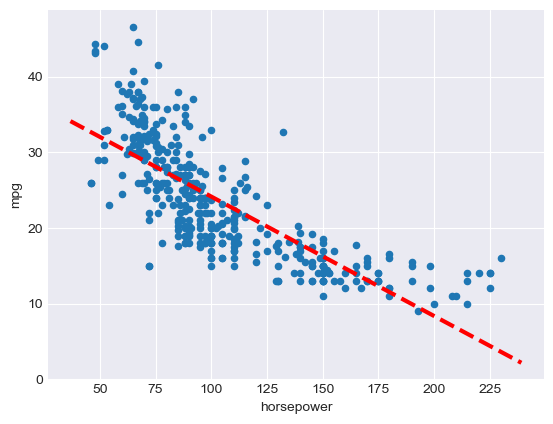

In [9]:
ax = auto.plot.scatter('horsepower', 'mpg')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

**(c) Produza alguns gráficos de diagnóstico do ajuste da regressão de mínimos quadrados conforme descrito no laboratório. Comente sobre quaisquer problemas que você observe com o ajuste.**





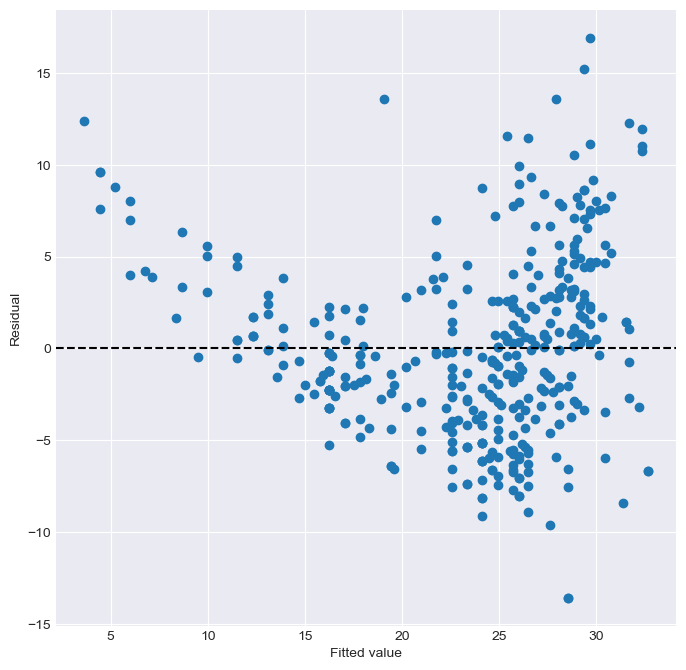

In [10]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

115

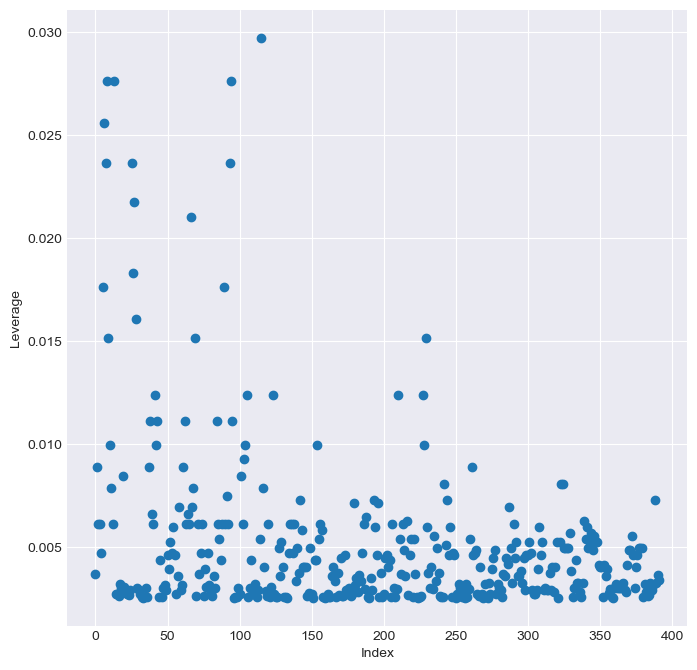

In [11]:
infl = results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

Há evidências de não lineariedade nos dados, quando plotamos os resíduos pelo valor ajustado.
O segundo gráfico mostra o quanto cada ponto da amostra influencia a estimativa dos coeficientes do modelo, o que pode ajudar a identificar pontos que podem estar exercendo influência excessiva sobre os resultados da regressão.

9. Essa questão envolve o uso de regressão linear múltipla no conjunto de dados `Auto.`

**(a) Plote uma matriz de dispersão que inclua todas as variáveis no dataset**

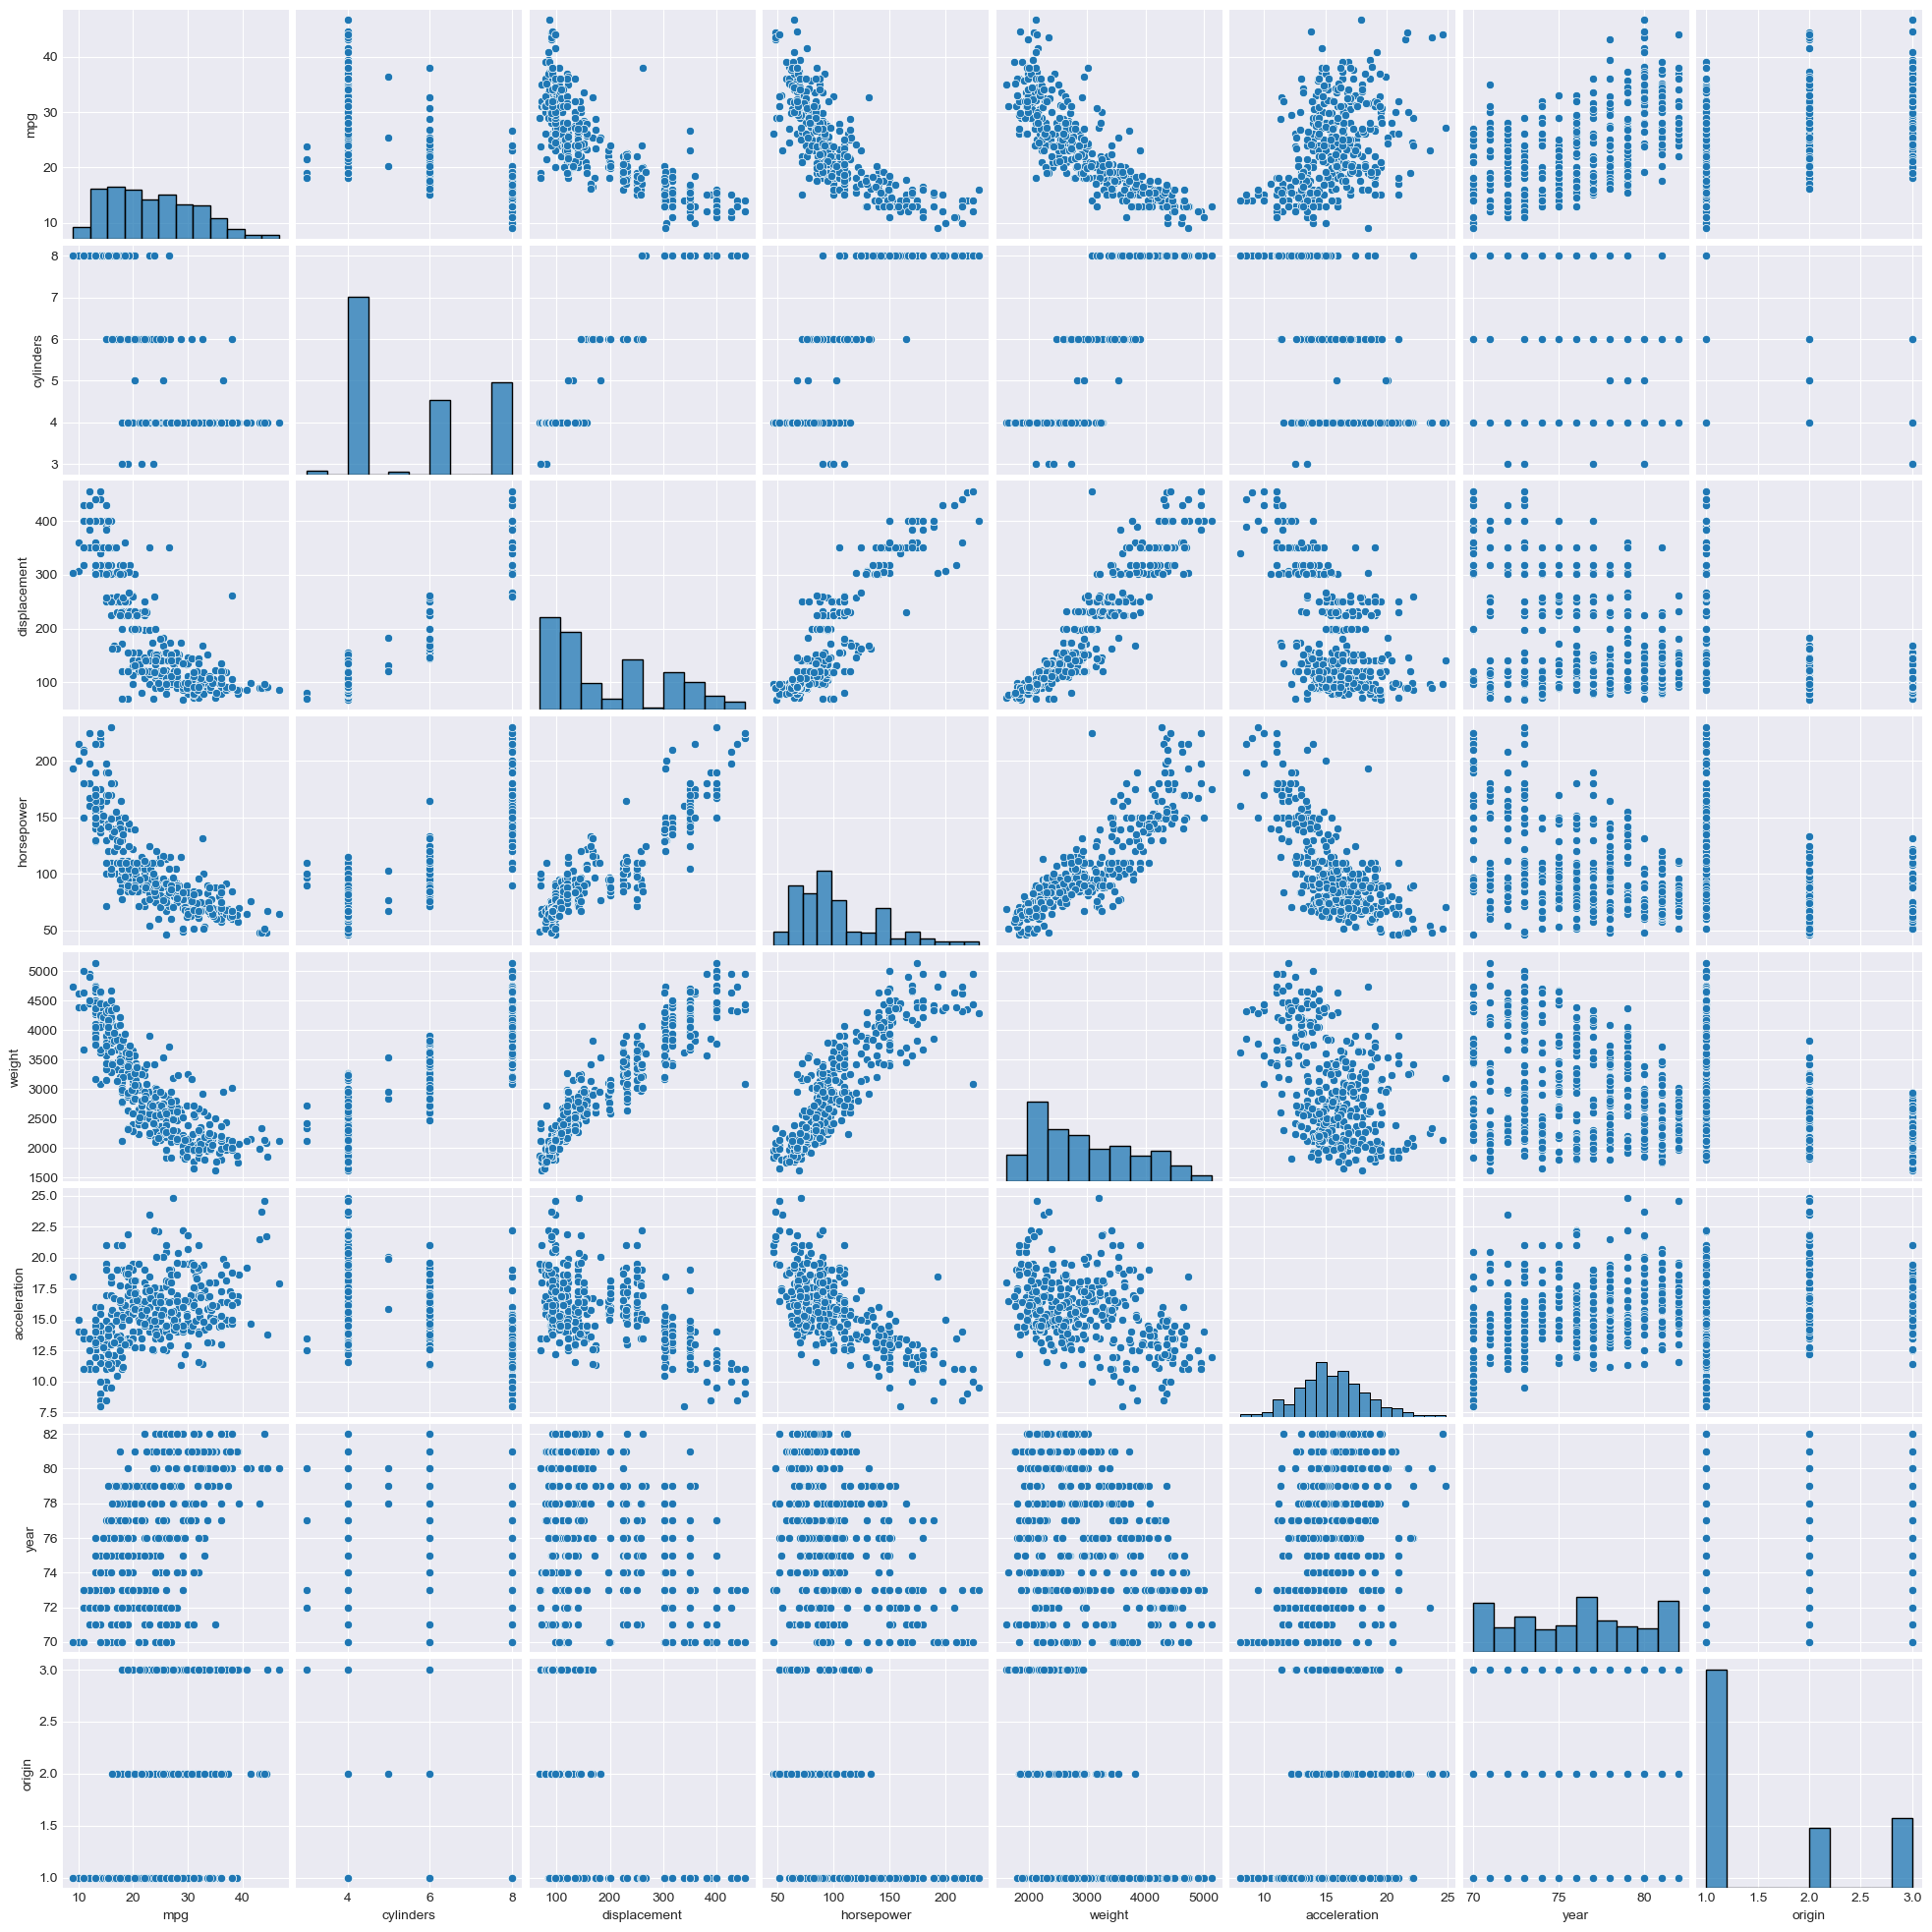

In [12]:
sns.pairplot(auto)
plt.show()

**(b) Calcule a matriz de correlações entre as variáveis usando o método `DataFrame.corr()`**

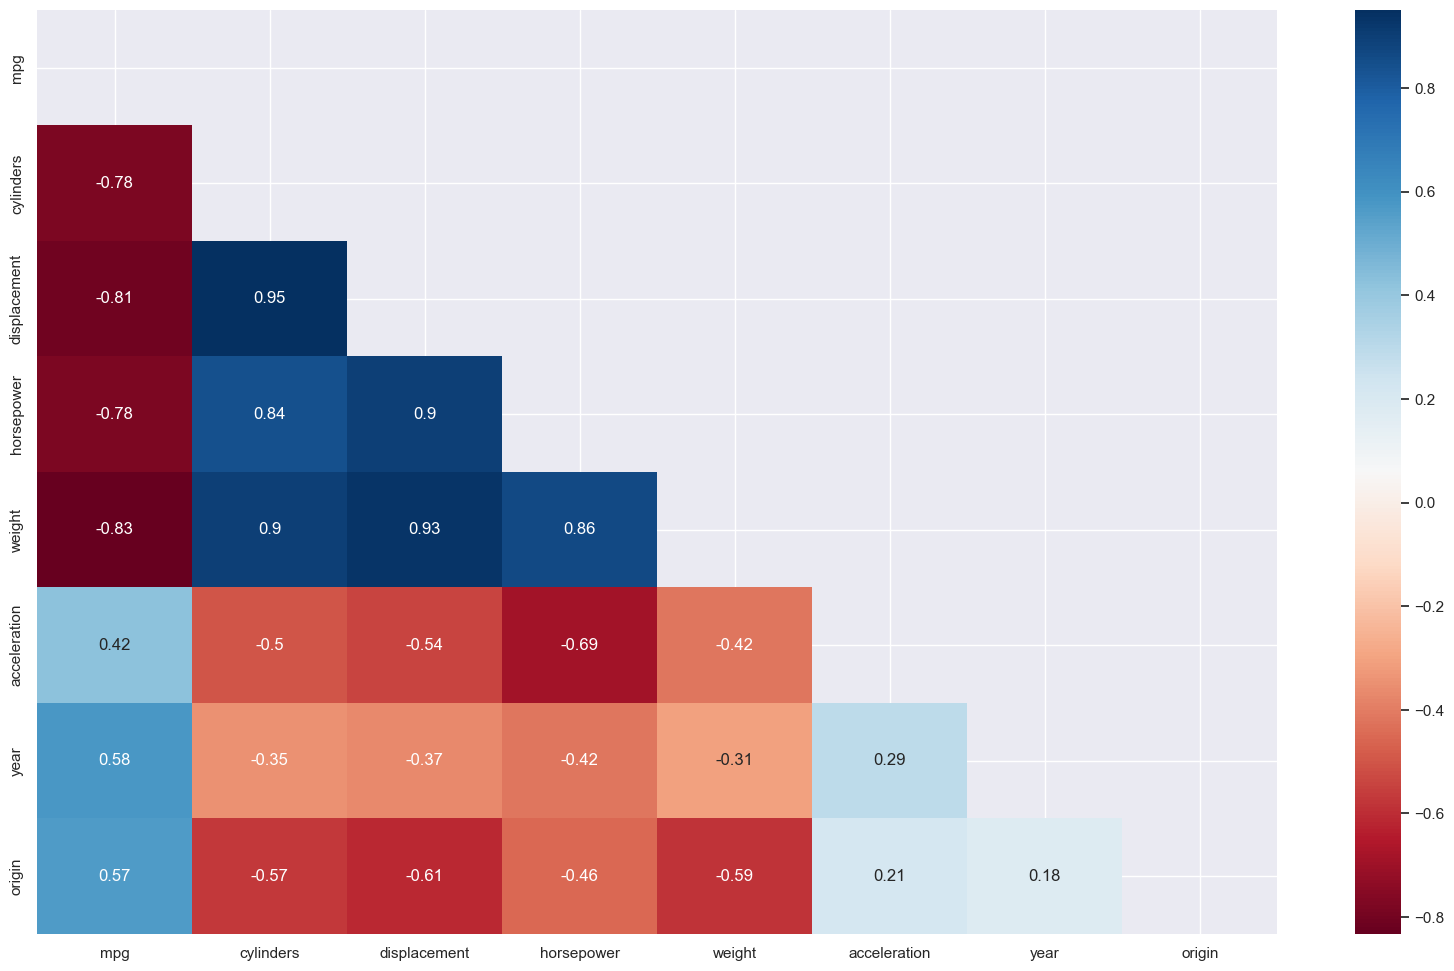

In [13]:
mask = np.triu(np.ones_like(auto.corr(), dtype=bool))
sns.set(rc = {'figure.figsize':(20, 12)})
sns.heatmap(auto.corr(), mask=mask,  annot=True, cmap='RdBu')
plt.show()

**(c) Utilize a função `sm.OLS()` para fazer uma regressão linear múltipla, tendo `mpg` como resposta e todas as outras variáveis, exceto `name`, como preditores. Utilize a função `summarize()` para imprimir os resultados. Comente sobre a saída. Por exemplo:**
    
    i. Existe uma relação entre os preditores e a resposta? Use a função `anova_lm()` do `statsmodels` para responder a esta pergunta.
    
    ii. Quais preditores parecem ter uma relação estatisticamente significativa com a resposta?

    iii. O que o coeficiente da variável year sugere?

In [14]:
features = auto.drop(['mpg', 'name'], axis =1)

In [15]:
features = MS(features).fit_transform(auto)
model_mlr = sm.OLS(y, features)
results_mlr = model_mlr.fit()
summarize(results_mlr)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


- year, year e origin são estatisticiamente significantes a 1% e displacemente é significante a 10%. 
- o coeficiente da variável year indica que o aumento de um ano impacta em 0.75 no mpg, tudo o mais constante.

**(d) Produza alguns gráficos de diagnóstico da regressão linear ajustada conforme descrito no laboratório. Comente sobre quaisquer problemas que você identificar com o ajuste. Os gráficos dos resíduos indicam a presença de outliers incomumente grandes? O gráfico de alavancagem identifica observações com alavancagem excepcionalmente alta?**

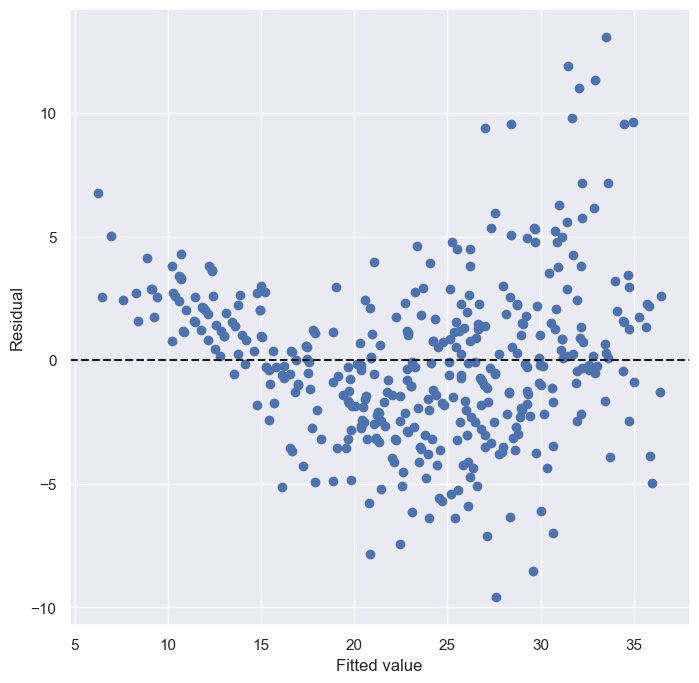

In [17]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results_mlr.fittedvalues, results_mlr.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

13

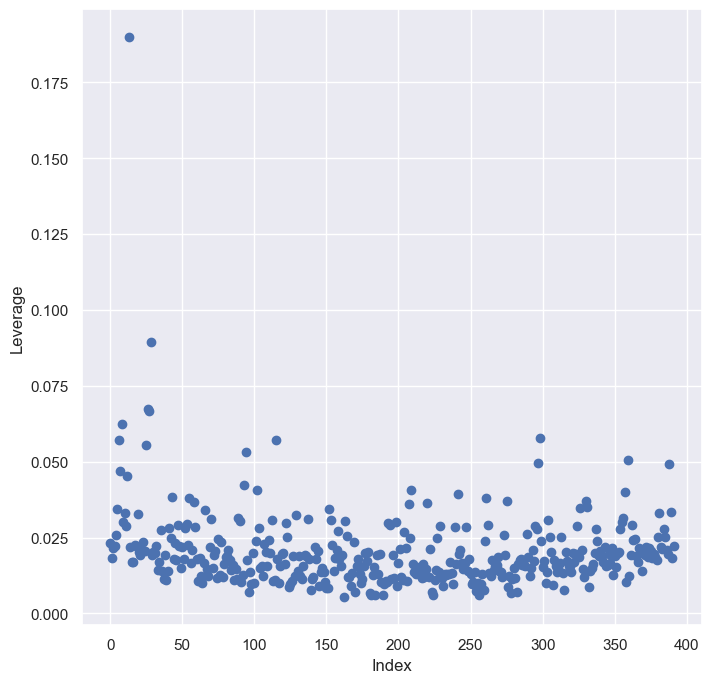

In [18]:
infl = results_mlr.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(features.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

A relação parece ser não linear e sugere alguns outliers, além disso pelo gráfico de alavancagem dá para observar que alguns dos dados tem alto poder de alavancagem.

**(e) Ajuste alguns modelos com interações conforme descrito no laboratório. Alguma interação parece ser estatisticamente significativa?**